# Monte Carlo World Cup Simulation

### Elo Data
###### Source date: 05/22/2018 
https://www.eloratings.net/

In [4]:
participant_elos = {'Australia':1714, 
                    'Iran':1796,
                    'Japan':1692, 
                    'Saudi Arabia': 1600,
                    'South Korea':1745, 
                    'Egypt':1646,
                    'Morocco':1711,
                    'Nigeria':1699,
                    'Senegal':1747,
                    'Tunisia':1649,
                    'Costa Rica':1745,
                    'Mexico':1859,
                    'Panama':1669,
                    'Argentina': 1985,
                    'Brazil':2131,
                    'Colombia':1935,
                    'Peru':1906,
                    'Uruguay':1891,
                    'Belgium':1931,
                    'Croatia':1853,
                    'Denmark':1843,
                    'England':1941,
                    'France':1984,
                    'Germany':2092,
                    'Iceland':1787,
                    'Poland':1831,
                    'Portugal':1975,
                    'Russia':1685,       # Host Country
                    'Serbia':1770,
                    'Spain':2049,
                    'Sweden':1796,
                    'Switzerland':1879              
                   }

#### Groups

In [5]:
groups = {'Group_A': ['Russia', 'Saudi Arabia', 'Egypt', 'Uruguay'],
          'Group_B': ['Portugal', 'Spain', 'Morocco', 'Iran'],
          'Group_C': ['France', 'Australia', 'Peru', 'Denmark'],
          'Group_D': ['Argentina', 'Iceland', 'Croatia', 'Nigeria'],
          'Group_E': ['Brazil', 'Switzerland', 'Costa Rica', 'Serbia'],
          'Group_F': ['Germany', 'Mexico', 'Sweden', 'South Korea'],
          'Group_G': ['Belgium', 'Panama', 'Tunisia', 'England'],
          'Group_H': ['Poland', 'Senegal', 'Colombia', 'Japan']       
        }

#### Plot Elo

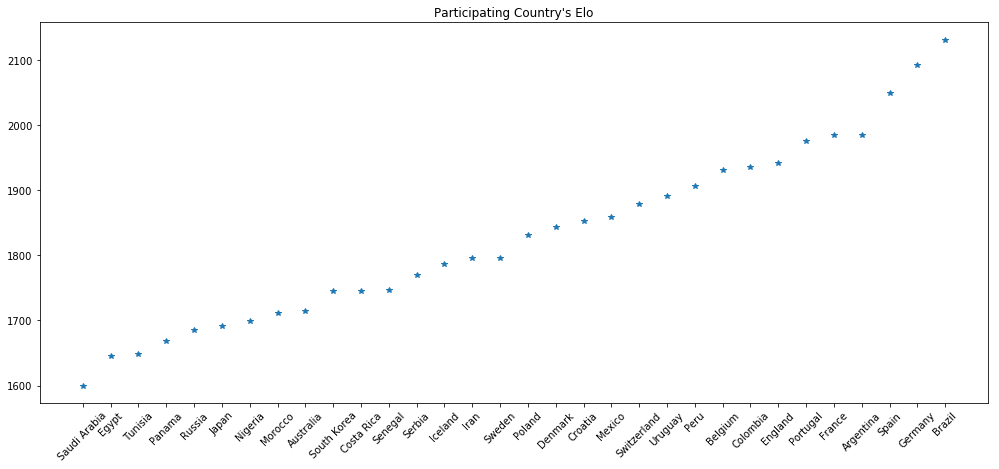

In [40]:
import pylab as pl

xTicks = sorted(participant_elos, key=participant_elos.__getitem__)
y = sorted(participant_elos.values())
x = list(range(len(y)))


pl.figure(figsize=(17, 7))
plt.title('Participating Country\'s Elo')
pl.xticks(x, xTicks)
pl.xticks(range(32), xTicks, rotation=45) #writes strings with 45 degree angle
pl.plot(x,y,'*')
pl.show()


#### Win probability formula
$$W_e = \frac{1}{10^{\frac{-d_r}{400}} + 1}$$


#### Helper Functions

In [41]:
import pandas as pd

def _create_score_pandas_structure(participant_elos):
    columns = ['Second_Group_Stage', 'Winner_Group_Stage', 'Quater-Finalist', 'Semi-Finalist', 'Finalist', 'Winner']
    rows = list(participant_elos.keys())

    df = pd.DataFrame(rows)
    for column in columns:
        df[column] = 0

    df = df.set_index(0)
    df.index.names = ['Country']
    return df

def _bernoulli_trial(success_rate):
    if success_rate > random.random():
        return True
    return False

def _win_probability(team, opponent, elo=participant_elos):
    team_elo = elo[team]
    opponent_elo = elo[opponent]
    return (1 / (10 ** ( - ( team_elo-opponent_elo) / 400) + 1 ) )

def _stochastic_game_winner(team, opponent, elo=participant_elos):
    team_win_rate = _win_probability(team, opponent, elo)
    if _bernoulli_trial(team_win_rate):
        return team
    
    return opponent

#### Computes group winners

In [7]:
from itertools import combinations
import random
from random import shuffle

def single_group_run(group_name):
    group_members = groups[group_name]
    shuffle(group_members)
    final_scores = {k:0 for k in group_members}
    for game in combinations(group_members, 2):
        win_prob = _win_probability(game[0], game[1], participant_elos)
        if _binomial_trial(win_prob):
            final_scores[game[0]] += 1
        else:
            final_scores[game[1]] += 1
            
    rank = sorted(final_scores, key=lambda k: final_scores[k], reverse=True)
    return rank[0], rank[1]


#### Brackets 

![image.png](img/match_paths.png)


### Run Single World Cup Simulation

In [8]:
def world_cup_single_run():
    a_first, a_second = single_group_run('Group_A')
    b_first, b_second = single_group_run('Group_B')
    c_first, c_second = single_group_run('Group_C')
    d_first, d_second = single_group_run('Group_D')
    e_first, e_second = single_group_run('Group_E')
    f_first, f_second = single_group_run('Group_F')
    g_first, g_second = single_group_run('Group_G')
    h_first, h_second = single_group_run('Group_H')
    
    sixteen_1 = _stochastic_game_winner(a_first, b_second)
    sixteen_2 = _stochastic_game_winner(c_first, d_second)
    sixteen_3 = _stochastic_game_winner(e_first, f_second)
    sixteen_4 = _stochastic_game_winner(g_first, h_second)
    sixteen_5 = _stochastic_game_winner(b_first, a_second)
    sixteen_6 = _stochastic_game_winner(d_first, c_second)
    sixteen_7 = _stochastic_game_winner(f_first, e_second)
    sixteen_8 = _stochastic_game_winner(h_first, g_second)
    
    quarter_final_1 = _stochastic_game_winner(sixteen_1, sixteen_2)
    quarter_final_2 = _stochastic_game_winner(sixteen_3, sixteen_4)
    quarter_final_3 = _stochastic_game_winner(sixteen_5, sixteen_6)
    quarter_final_4 = _stochastic_game_winner(sixteen_7, sixteen_8)
    
    semi_final_1 = _stochastic_game_winner(quarter_final_1, quarter_final_2)
    semi_final_2 = _stochastic_game_winner(quarter_final_3, quarter_final_4)
    
    winner = _stochastic_game_winner(semi_final_1, semi_final_2)
    
    results_pandas = _create_score_pandas_structure(participant_elos)
    
    detailed_results = {'Second_Group_Stage': [a_second, b_second, c_second, d_second, e_second, f_second, g_second, h_second],
                        'Winner_Group_Stage': [a_first, b_first, c_first, d_first, e_first, f_first, g_first, h_first],
                        'Quater-Finalist': [sixteen_1, sixteen_2, sixteen_3, sixteen_4, sixteen_5, sixteen_6, sixteen_7, sixteen_8],
                        'Semi-Finalist': [quarter_final_1, quarter_final_2, quarter_final_3, quarter_final_4],
                        'Finalist': [semi_final_1, semi_final_2],
                        'Winner': [winner]
                       }
    
    for stage in detailed_results:
        for country in detailed_results[stage]:
            results_pandas.loc[country,stage] = 1
    
    return results_pandas


    

### Simulate 10,000 World Cups

In [43]:
def calculate_world_cup_outcome_probabilities(number_of_runs):
    countries = participant_elos.keys()
    wins_total_pandas = _create_score_pandas_structure(participant_elos)
    
    for run in range(number_of_runs):
        wins_total_pandas = wins_total_pandas.add(world_cup_single_run())
    
    # Normalize
    wins_total_pandas['Second_Group_Stage'] = wins_total_pandas['Second_Group_Stage']/number_of_runs
    wins_total_pandas['Winner_Group_Stage'] = wins_total_pandas['Winner_Group_Stage']/number_of_runs
    wins_total_pandas['Quater-Finalist'] = wins_total_pandas['Quater-Finalist']/number_of_runs
    wins_total_pandas['Semi-Finalist'] = wins_total_pandas['Semi-Finalist']/number_of_runs
    wins_total_pandas['Finalist'] = wins_total_pandas['Finalist']/number_of_runs
    wins_total_pandas['Winner'] = wins_total_pandas['Winner']/number_of_runs
    
    wins_total_pandas=wins_total_pandas.sort_values(by="Winner", ascending=False)
    
    return wins_total_pandas
    
calculate_world_cup_outcome_probabilities(10000)*100

,Second_Group_Stage,Winner_Group_Stage,Quater-Finalist,Semi-Finalist,Finalist,Winner
Country,,,,,,
Brazil,19.35,74.23,72.41,56.83,42.09,28.69
Germany,20.22,70.07,62.25,46.76,31.09,18.52
Spain,31.75,53.05,70.25,47.71,26.60,14.67
Portugal,39.43,34.51,56.28,33.00,15.07,6.59
France,29.56,47.59,49.20,28.15,12.59,5.76
Argentina,26.79,55.67,49.58,26.55,11.83,5.43
England,35.78,46.28,52.45,20.55,10.19,4.38
Belgium,38.00,42.91,50.47,19.58,9.28,3.35
Colombia,27.99,51.98,45.54,17.76,8.21,2.99


In [10]:
##OBSOLETE
def calculate_group_outcome_probabilities(group_name, number_of_runs):
    group_members = groups[group_name]
    first_place_count = {k:0 for k in group_members}
    second_place_count = {k:0 for k in group_members}
    for run in range(number_of_runs):
        first, second = single_group_run(group_name)
        first_place_count[first] += 1
        second_place_count[second] += 1
        
    first_place_normalized = {key:float(value)/sum(first_place_count.values()) for (key,value) in first_place_count.items()}
    second_place_normalized = {key:float(value)/sum(second_place_count.values()) for (key,value) in second_place_count.items()}
        
    return first_place_normalized, second_place_normalized